### Capstone Two: Modelling

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from pandas import get_dummies
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve,f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report,plot_roc_curve,plot_precision_recall_curve
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

In [2]:
clean_df = pd.read_csv('Clean_df.csv')

In [3]:
clean_df.head()

,age,age group,eligible,job,salary,marital,education,targeted,default,balance,...,contact,day,month,duration,campaign,pdays,previous,poutcome,y,response
0,58,5,Y,management,100000,married,tertiary,yes,no,2143,...,unknown,5,may,261,1,-1,0,unknown,no,0
1,44,4,Y,technician,60000,single,secondary,yes,no,29,...,unknown,5,may,151,1,-1,0,unknown,no,0
2,33,3,Y,entrepreneur,120000,married,secondary,yes,no,2,...,unknown,5,may,76,1,-1,0,unknown,no,0
3,47,4,Y,blue-collar,20000,married,unknown,no,no,1506,...,unknown,5,may,92,1,-1,0,unknown,no,0
4,33,3,Y,unknown,0,single,unknown,no,no,1,...,unknown,5,may,198,1,-1,0,unknown,no,0


In [4]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 22 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   age group  45211 non-null  int64 
 2   eligible   45211 non-null  object
 3   job        45211 non-null  object
 4   salary     45211 non-null  int64 
 5   marital    45211 non-null  object
 6   education  45211 non-null  object
 7   targeted   45211 non-null  object
 8   default    45211 non-null  object
 9   balance    45211 non-null  int64 
 10  housing    45211 non-null  object
 11  loan       45211 non-null  object
 12  contact    45211 non-null  object
 13  day        45211 non-null  int64 
 14  month      45211 non-null  object
 15  duration   45211 non-null  int64 
 16  campaign   45211 non-null  int64 
 17  pdays      45211 non-null  int64 
 18  previous   45211 non-null  int64 
 19  poutcome   45211 non-null  object
 20  y          45211 non-null  o

In [5]:
# separate continuous and categorical variables

In [6]:
cont_features = []
cat_features = []

for c in clean_df.columns:
    if clean_df[c].dtype == 'int':
        cont_features += [c]
    else:
        cat_features += [c]

In [7]:
# check outliers in cont. columns

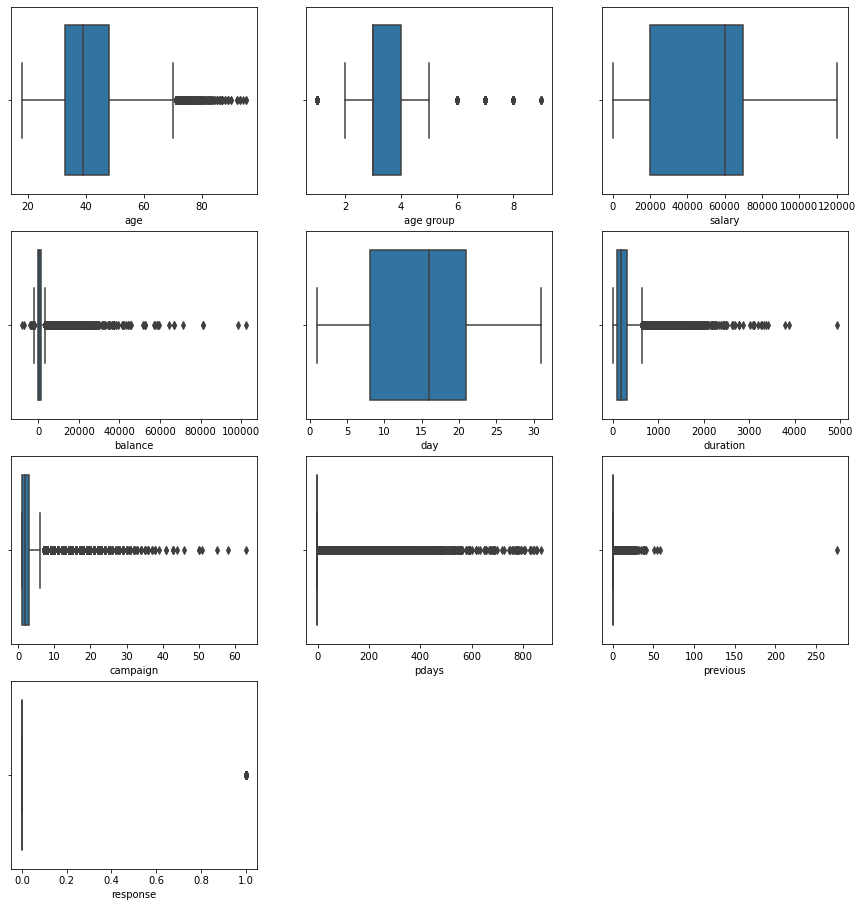

In [8]:
i=1
plt.figure(figsize=(15,20))
for j in cont_features:
    plt.subplot(5,3,i)
    sns.boxplot(data=clean_df,x=j)
    i+=1

In [9]:
# Treat the outliers

In [10]:
def outlier_tret(x):
    upper=x.quantile(0.98)
    lower=x.quantile(0.2)
    x=np.where(x>upper,upper,x)
    x=np.where(x<lower,lower,x)
    return x

In [11]:
clean_df[cont_features]=clean_df[cont_features].apply(lambda x: outlier_tret(x))

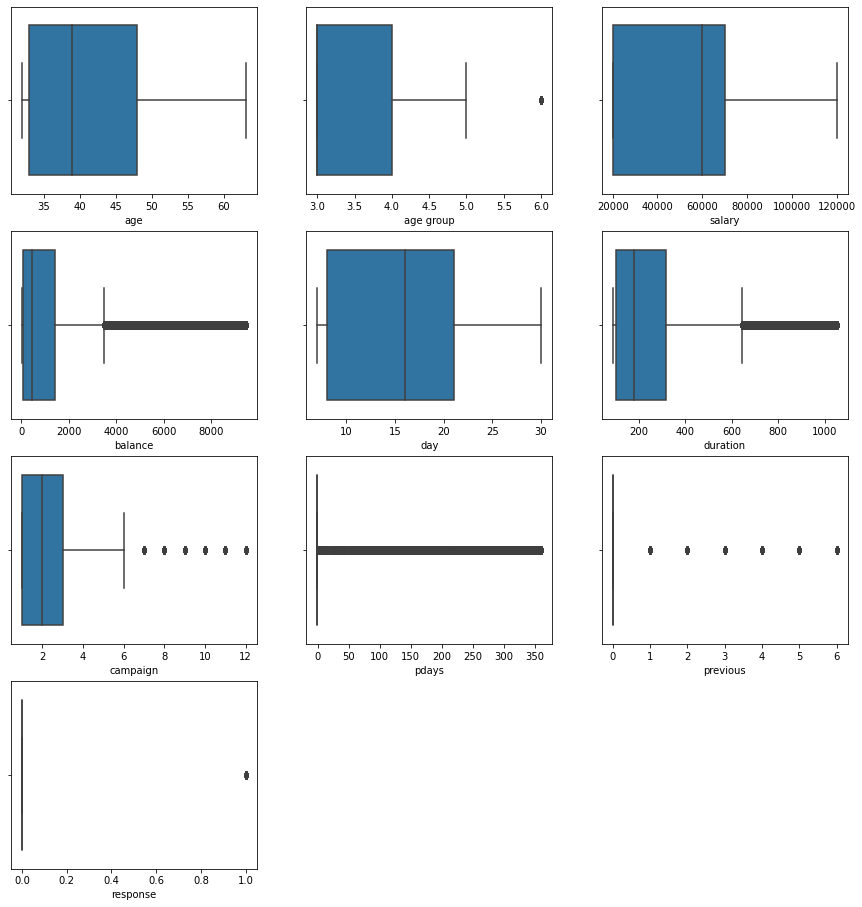

In [12]:
i=1
plt.figure(figsize=(15,20))
for j in cont_features:
    plt.subplot(5,3,i)
    sns.boxplot(data=clean_df,x=j)
    i+=1

In [13]:
cat_features

['eligible',
 'job',
 'marital',
 'education',
 'targeted',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome',
 'y']

In [14]:
# scale cat_features using get_dummies()

In [15]:
new_data = pd.get_dummies(data=clean_df,columns=cat_features,drop_first=True)
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 48 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  45211 non-null  float64
 1   age group            45211 non-null  float64
 2   salary               45211 non-null  float64
 3   balance              45211 non-null  float64
 4   day                  45211 non-null  float64
 5   duration             45211 non-null  float64
 6   campaign             45211 non-null  float64
 7   pdays                45211 non-null  float64
 8   previous             45211 non-null  float64
 9   response             45211 non-null  float64
 10  eligible_Y           45211 non-null  uint8  
 11  job_blue-collar      45211 non-null  uint8  
 12  job_entrepreneur     45211 non-null  uint8  
 13  job_housemaid        45211 non-null  uint8  
 14  job_management       45211 non-null  uint8  
 15  job_retired          45211 non-null 

In [16]:
new_data.describe()

,age,age group,salary,balance,day,duration,campaign,pdays,previous,response,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,y_yes
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,...,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,41.503749,3.748203,57921.081153,1250.385172,16.296499,258.197806,2.631882,39.162217,0.485391,0.116985,...,0.118135,0.010551,0.304483,0.087810,0.016323,0.012807,0.040698,0.033421,0.817478,0.116985
std,9.185821,0.892862,30797.589803,1978.975055,7.607262,216.348199,2.314932,95.520042,1.262190,0.321406,...,0.322771,0.102174,0.460193,0.283022,0.126718,0.112441,0.197592,0.179735,0.386278,0.321406
min,32.000000,3.000000,20000.000000,22.000000,7.000000,89.000000,1.000000,-1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,33.000000,3.000000,20000.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,39.000000,3.000000,60000.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,48.000000,4.000000,70000.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,63.000000,6.000000,120000.000000,9439.400000,30.000000,1051.000000,12.000000,360.000000,6.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [17]:
new_data.head()


,age,age group,salary,balance,day,duration,campaign,pdays,previous,response,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,y_yes
0,58.0,5.0,100000.0,2143.0,7.0,261.0,1.0,-1.0,0.0,0.0,...,0,0,1,0,0,0,0,0,1,0
1,44.0,4.0,60000.0,29.0,7.0,151.0,1.0,-1.0,0.0,0.0,...,0,0,1,0,0,0,0,0,1,0
2,33.0,3.0,120000.0,22.0,7.0,89.0,1.0,-1.0,0.0,0.0,...,0,0,1,0,0,0,0,0,1,0
3,47.0,4.0,20000.0,1506.0,7.0,92.0,1.0,-1.0,0.0,0.0,...,0,0,1,0,0,0,0,0,1,0
4,33.0,3.0,20000.0,22.0,7.0,198.0,1.0,-1.0,0.0,0.0,...,0,0,1,0,0,0,0,0,1,0


In [18]:
# Scale cont. data
# check current distribution

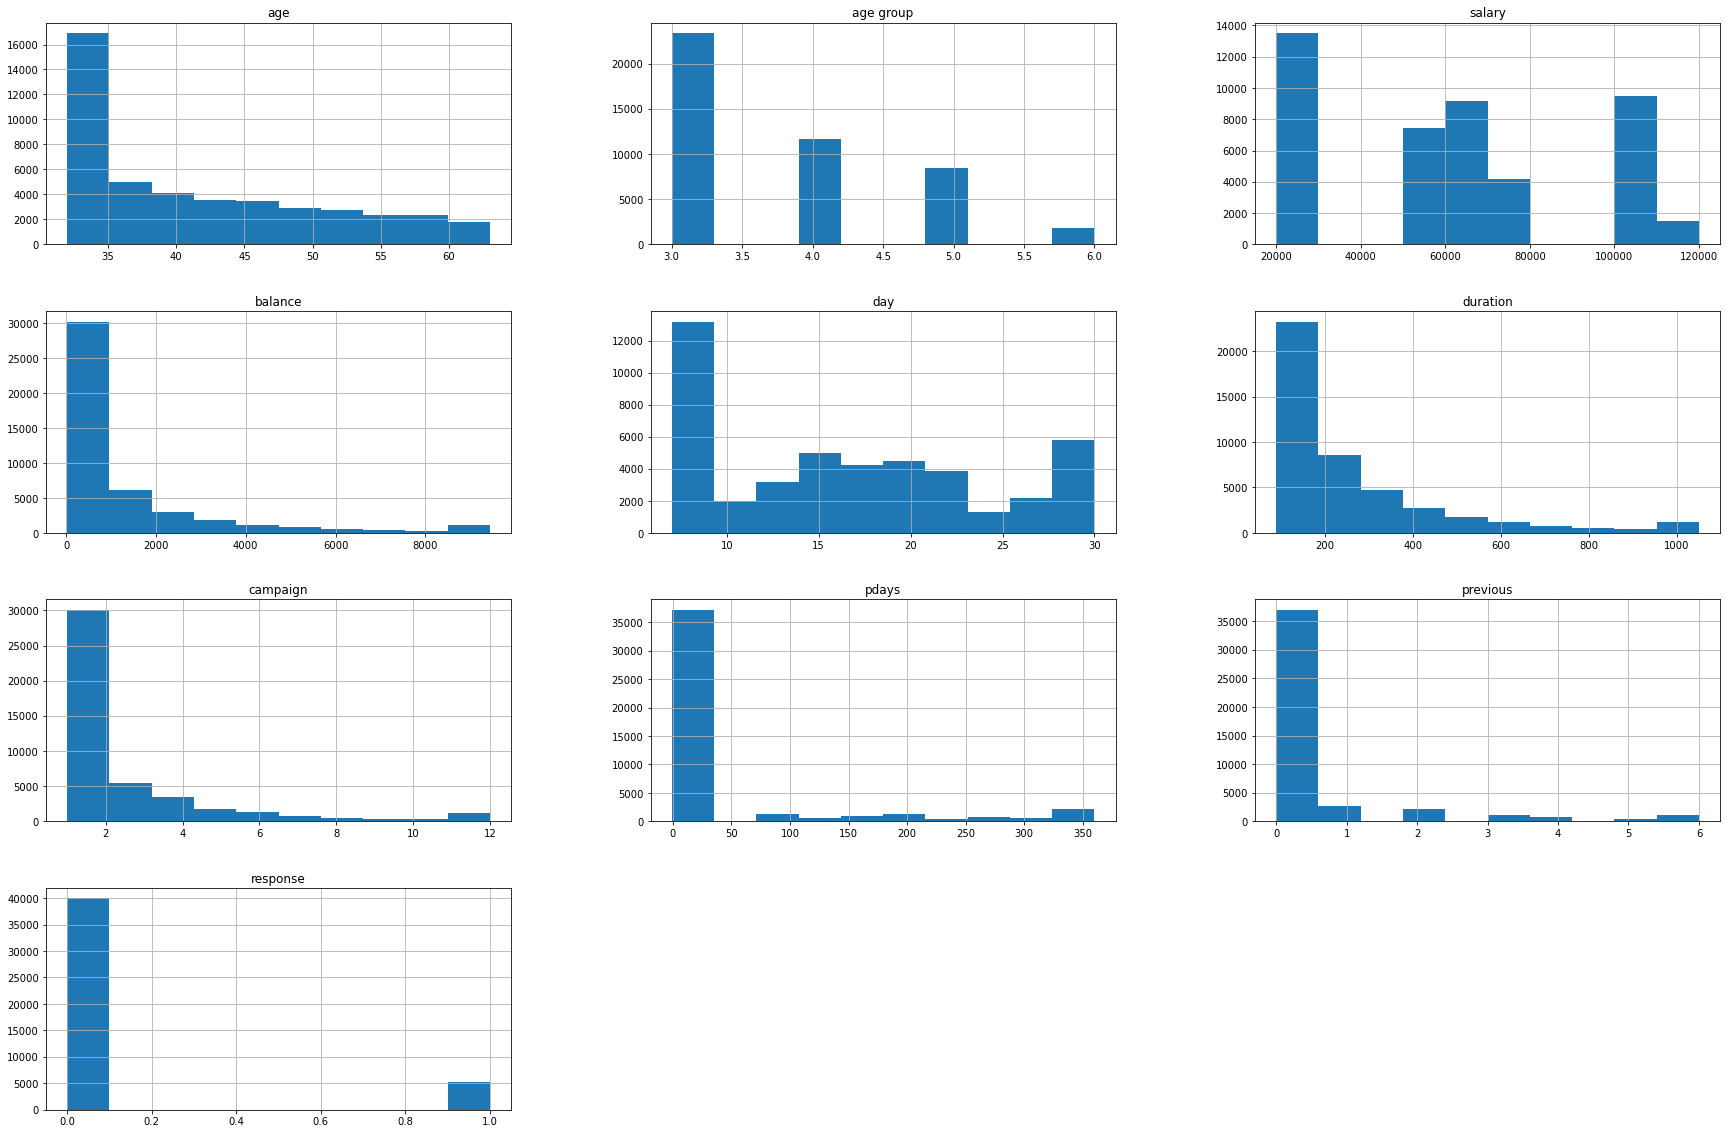

In [19]:
new_data[cont_features].hist(figsize=(30,20))
plt.show()

Log transform data to create normal distribution:

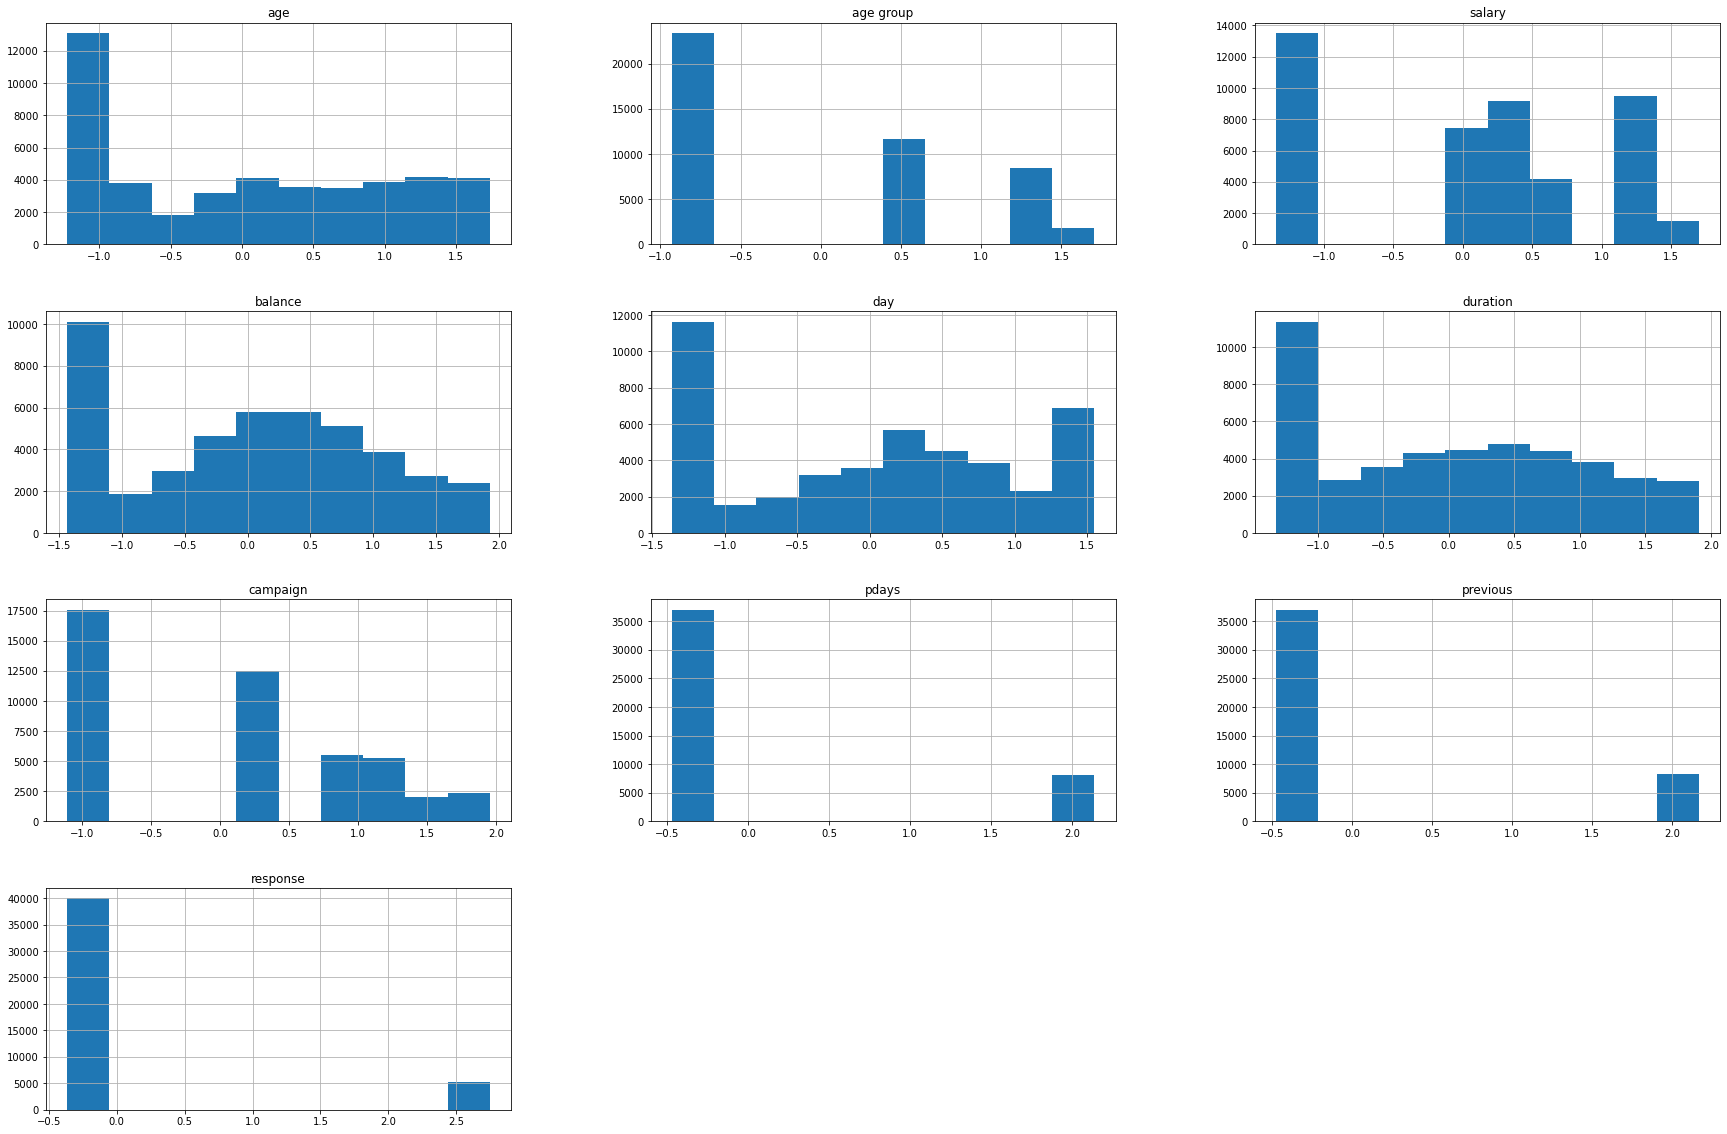

In [20]:
from sklearn.preprocessing import PowerTransformer

# Instantiate PowerTransformer
pow_trans = PowerTransformer()

# Transform on the data
new_data[cont_features] = pow_trans.fit_transform(new_data[cont_features])
new_data[cont_features].hist(figsize=(30,20))
plt.show()

In [21]:
new_data.describe()

,age,age group,salary,balance,day,duration,campaign,pdays,previous,response,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,y_yes
count,4.521100e+04,4.521100e+04,4.521100e+04,4.521100e+04,4.521100e+04,4.521100e+04,4.521100e+04,4.521100e+04,4.521100e+04,4.521100e+04,...,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,1.853702e-13,3.321234e-14,-6.181500e-15,-2.310632e-15,-3.322109e-15,-2.222946e-15,-2.573145e-14,-2.728737e-13,-2.715427e-13,-9.378315e-14,...,0.118135,0.010551,0.304483,0.087810,0.016323,0.012807,0.040698,0.033421,0.817478,0.116985
std,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,...,0.322771,0.102174,0.460193,0.283022,0.126718,0.112441,0.197592,0.179735,0.386278,0.321406
min,-1.224823e+00,-9.298537e-01,-1.342663e+00,-1.437665e+00,-1.365798e+00,-1.315596e+00,-1.108996e+00,-4.725341e-01,-4.725436e-01,-3.639826e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-1.017321e+00,-9.298537e-01,-1.342663e+00,-8.723090e-01,-1.151470e+00,-1.002268e+00,-1.108996e+00,-4.725341e-01,-4.725436e-01,-3.639826e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,-3.982416e-02,-9.298537e-01,2.147800e-01,9.046212e-02,1.282313e-01,1.429181e-02,1.327923e-01,-4.725341e-01,-4.725436e-01,-3.639826e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,8.844599e-01,6.353438e-01,5.045692e-01,7.545421e-01,7.113539e-01,8.104834e-01,7.404565e-01,-4.725341e-01,-4.725436e-01,-3.639826e-01,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.735980e+00,1.705367e+00,1.699053e+00,1.929497e+00,1.551058e+00,1.907453e+00,1.955467e+00,2.139860e+00,2.166943e+00,2.747384e+00,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [22]:
corr=new_data.corr()[['y_yes']].sort_values(by='y_yes',ascending=False)

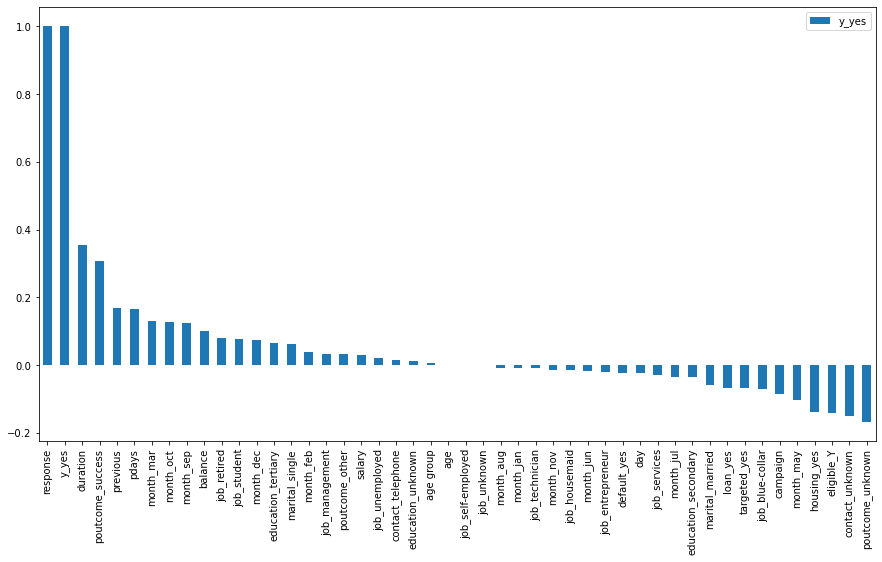

In [23]:
corr.plot(kind='bar',figsize=(15,8))
plt.show()

In [24]:
sc=StandardScaler()

In [25]:
scaled=sc.fit_transform(new_data[cont_features])
scaled=pd.DataFrame(scaled,columns=cont_features)
scaled_data=pd.concat([scaled,new_data.drop(columns=cont_features)],axis=1)

In [26]:
scaled_data1=scaled_data.drop(columns=['y_yes', 'response'])

In [28]:
X = scaled_data1
X


,age,age group,salary,balance,day,duration,campaign,pdays,previous,eligible_Y,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,1.512372,1.340777,1.260884,0.997132,-1.365798,0.555739,-1.108996,-0.472534,-0.472544,1,...,0,0,0,1,0,0,0,0,0,1
1,0.531196,0.635344,0.214780,-1.310670,-1.365798,-0.277111,-1.108996,-0.472534,-0.472544,1,...,0,0,0,1,0,0,0,0,0,1
2,-1.017321,-0.929854,1.699053,-1.437665,-1.365798,-1.315596,-1.108996,-0.472534,-0.472544,1,...,0,0,0,1,0,0,0,0,0,1
3,0.803098,0.635344,-1.342663,0.786023,-1.365798,-1.242598,-1.108996,-0.472534,-0.472544,1,...,0,0,0,1,0,0,0,0,0,1
4,-1.017321,-0.929854,-1.342663,-1.437665,-1.365798,0.162473,-1.108996,-0.472534,-0.472544,1,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,1.105081,1.340777,0.214780,0.435009,0.254105,1.856877,0.740456,-0.472534,-0.472544,1,...,0,0,0,0,1,0,0,0,0,1
45207,1.735980,1.705367,0.060200,0.868186,0.254105,1.207502,0.132792,-0.472534,-0.472544,0,...,0,0,0,0,1,0,0,0,0,1
45208,1.735980,1.705367,0.060200,1.605628,0.254105,1.907453,1.335679,2.122605,2.160663,0,...,0,0,0,0,1,0,0,0,1,0
45209,1.461738,1.340777,-1.342663,0.314583,0.254105,1.314663,1.099364,-0.472534,-0.472544,1,...,0,0,0,0,1,0,0,0,0,1


In [30]:
Y=scaled_data[['y_yes']]

In [31]:
Y.value_counts()


y_yes
0        39922
1         5289
dtype: int64

In [32]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=.3,random_state=0)


In [33]:
lg=LogisticRegression()
dt=DecisionTreeClassifier()
rf=RandomForestClassifier()

In [34]:
algo=[lg,dt,rf]

In [35]:
for i in algo:
    i.fit(x_train,np.ravel(y_train))
    acc=i.score(x_test,y_test)
    print(acc,i)

0.9007667354762607 LogisticRegression()
0.8708345620760838 DecisionTreeClassifier()
0.902241226776762 RandomForestClassifier()


In [36]:
dt1=DecisionTreeClassifier()

In [37]:
dt1.fit(x_train,y_train)

DecisionTreeClassifier()

In [38]:
y_pred=dt1.predict(x_test)

In [39]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.92      0.93     11969
           1       0.45      0.48      0.47      1595

    accuracy                           0.87     13564
   macro avg       0.69      0.70      0.70     13564
weighted avg       0.87      0.87      0.87     13564



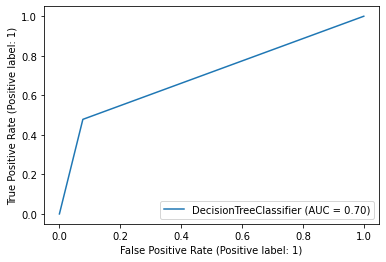

In [40]:
plot_roc_curve(dt1,x_test,y_test)

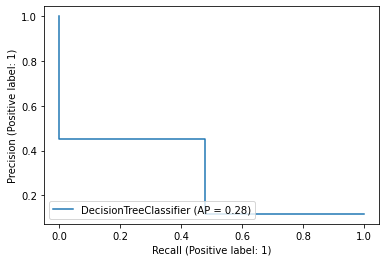

In [41]:
plot_precision_recall_curve(dt1,x_test,y_test)


In [42]:
import xgboost
xgb = xgboost.XGBClassifier(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=7)
xgb.fit(x_train,y_train.squeeze().values)

#calculate and print scores for the model for top 15 features
y_train_preds = xgb.predict(x_train)
y_test_preds = xgb.predict(x_test)

print('XGB accuracy score for train: %.3f: test: %.3f' % (
        accuracy_score(y_train, y_train_preds),
        accuracy_score(y_test, y_test_preds)))

[22:36:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGB accuracy score for train: 0.941: test: 0.903
